In [1]:
# # If running in google colab:
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob, Word

In [3]:
# Read in data
data = pd.read_csv('../data/sentiment_df.csv')

# # Read in data from Google Colab. Update directory accordingly.
# data = pd.read_csv('/content/drive/MyDrive/Python/vectors_labels_df.csv')

In [4]:
# Using TextBlob to find sentiment score for each politician's doc
# https://stackabuse.com/sentiment-analysis-in-python-with-textblob/
# https://towardsdatascience.com/aspect-based-sentiment-analysis-using-spacy-textblob-4c8de3e0d2b9

# data['sentiment'] = [TextBlob(i).sentiment.polarity for i in data['liststring']]

In [5]:
data.head(2)

,screen_name,state,position,name,party,tweet_count,text_concat_clean,liststring,vectors,text_length,word_length,km_label,dbscan_label,km_label_cvec,km_label_tvec,sentiment
0,CongressmanRaja,IL,Representative,Raja Krishnamoorthi,D,4845,"['tonight', 'president', 'stage', 'elaborate',...",'tonight' 'president' 'stage' 'elaborate' 'pho...,"[-0.2115751579, 0.39771672760000004, 0.0444499...",1623390,178283,1,0,0,1,0.079249
1,RepMcGovern,MA,Representative,James McGovern,D,3587,"['hell', 'Donald', 'Trump', 'think', 'teargass...",'hell' 'Donald' 'Trump' 'think' 'teargasse' 'p...,"[-0.20878361280000002, 0.39065130130000003, 0....",1313476,154634,1,0,0,1,0.100858


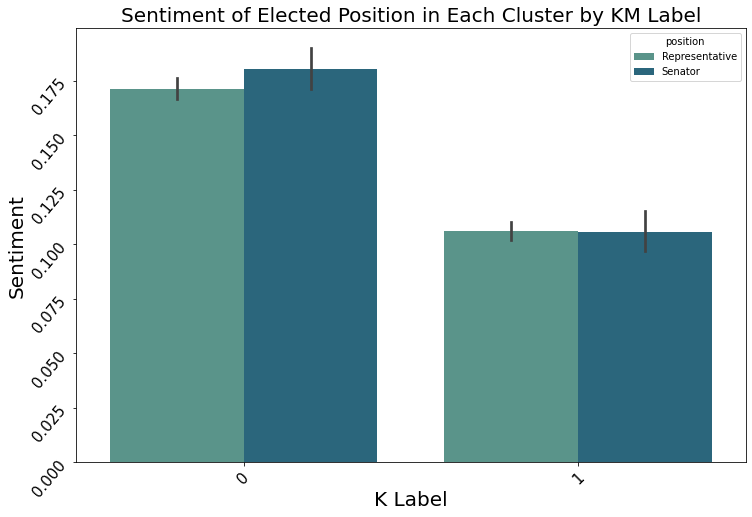

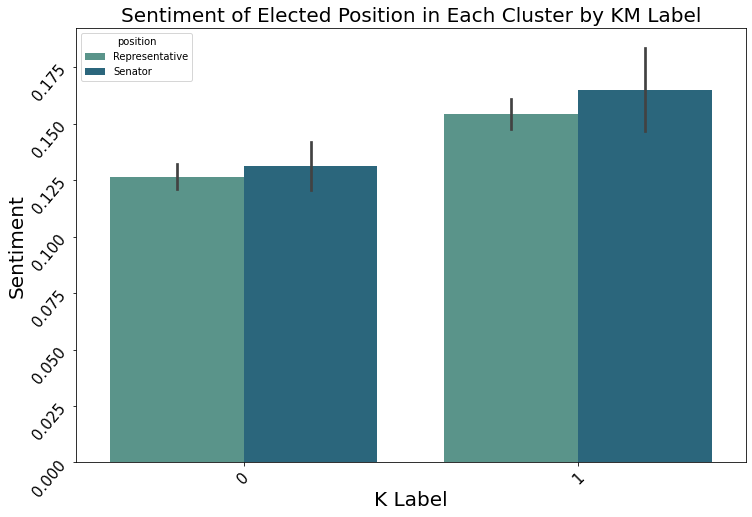

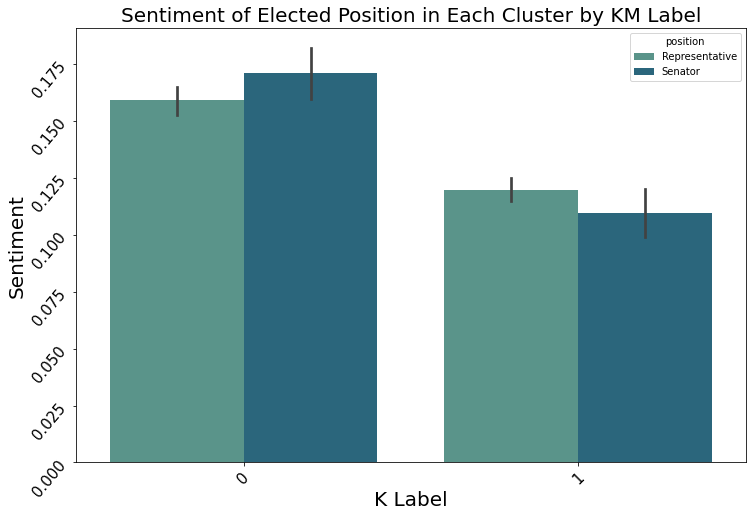

In [6]:
# SENTIMENT

plt.rcParams['figure.figsize'] = [12, 8]

sns.barplot(x='km_label', 
            y='sentiment', 
            hue='position',
            palette = 'crest',
            data=data,
#             order=data.sort_values('sentiment',ascending = False).km_label
           )

plt.title('Sentiment of Elected Position in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()



plt.rcParams['figure.figsize'] = [12, 8]

sns.barplot(x='km_label_cvec', 
            y='sentiment', 
            hue='position',
            palette = 'crest',
            data=data,
#             order=data.sort_values('sentiment',ascending = False).km_label
           )

plt.title('Sentiment of Elected Position in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()




plt.rcParams['figure.figsize'] = [12, 8]

sns.barplot(x='km_label_tvec', 
            y='sentiment', 
            hue='position',
            palette = 'crest',
            data=data,
#             order=data.sort_values('sentiment',ascending = False).km_label
           )

plt.title('Sentiment of Elected Position in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Sentiment', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

In [7]:
data.groupby(['km_label', 'position']).agg(position_cnt =('position','count'))

position_cnt
km_label position                    
0        Representative           216
         Senator                   47
1        Representative           206
         Senator                   52

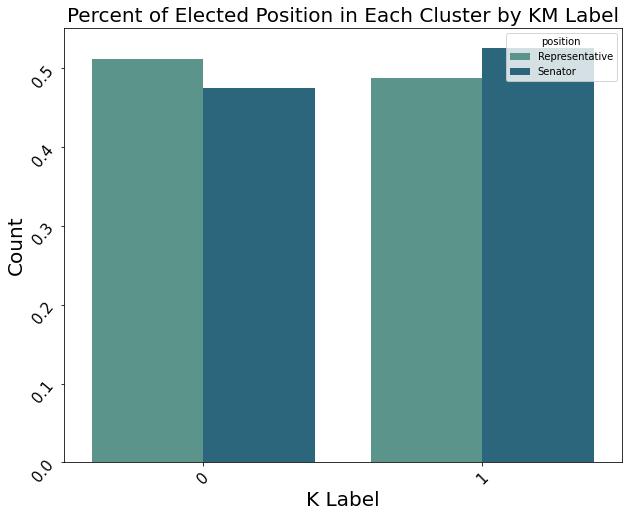

In [8]:
x, y, hue = 'km_label', 'proportion', 'position'
hue_order = ['Representative', 'Senator']

plt.figure(figsize=(10, 8))

(data[x]
 .groupby(data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest',
#       order=plot_data.sort_values('proportion',ascending = False).x
      ))

plt.title('Percent of Elected Position in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()


In [9]:
def bar_plot(x_, y_, hue_, title_, xlabel_, ylabel_):
    x, y, hue = x_, y_, hue_
    
    plt.rcParams['figure.figsize'] = [12, 8]

    # hue_order = ['Representative', 'Senator']

    (data[x]
     .groupby(data[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

    
    plt.title(title_, fontsize=20)

    plt.xlabel(xlabel_, fontsize=20)
    plt.xticks(fontsize= 15, rotation=45)
    plt.ylabel(ylabel_, fontsize=20)
    plt.yticks(fontsize= 15, rotation=50)

    plt.show()

In [10]:
data.groupby(['km_label', 'position']).agg(position_cnt =('position','count'))

position_cnt
km_label position                    
0        Representative           216
         Senator                   47
1        Representative           206
         Senator                   52

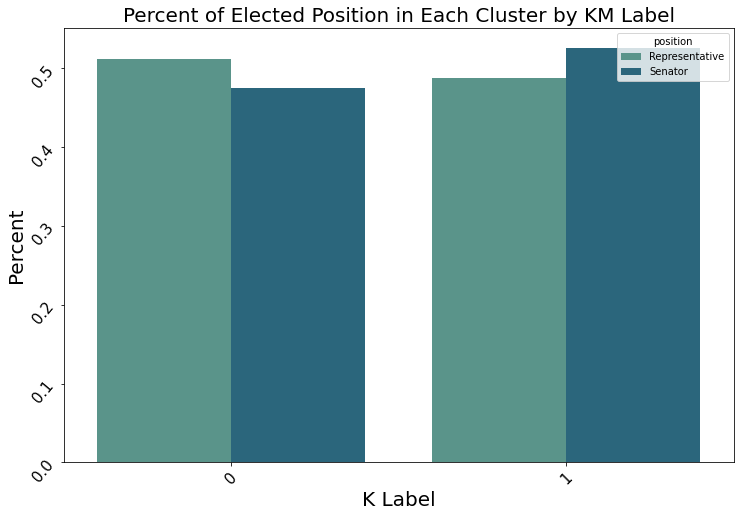

In [11]:
bar_plot('km_label', 'proportion', 'position', 'Percent of Elected Position in Each Cluster by KM Label', 'K Label', 'Percent')

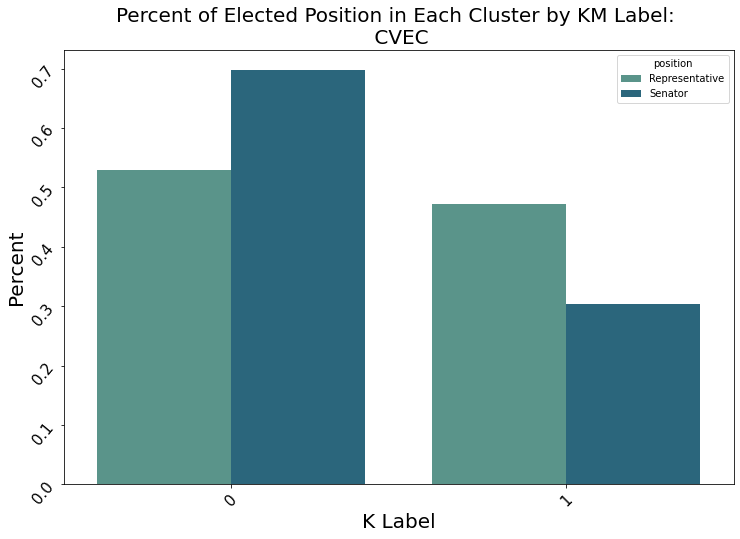

In [12]:
bar_plot('km_label_cvec', 'proportion', 'position', 'Percent of Elected Position in Each Cluster by KM Label: \n CVEC', 'K Label', 'Percent')

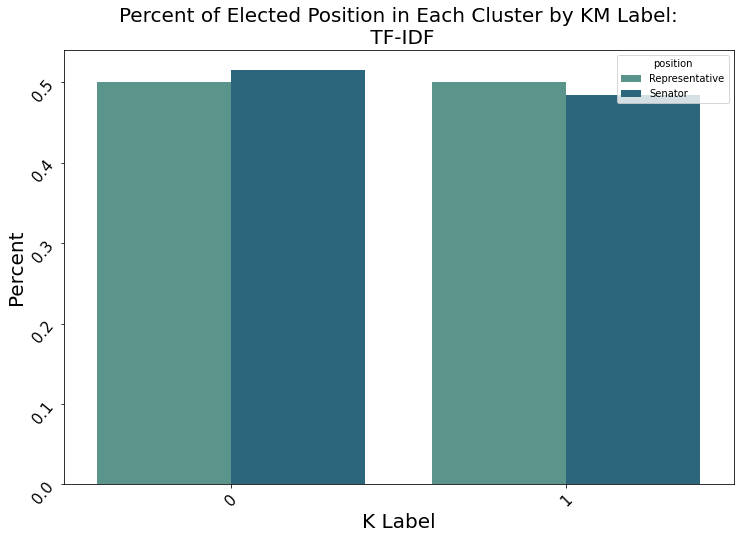

In [13]:
bar_plot('km_label_tvec', 'proportion', 'position', 'Percent of Elected Position in Each Cluster by KM Label:\n TF-IDF', 'K Label', 'Percent')

In [14]:
data.groupby(['km_label', 'party']).agg(position_cnt =('position','count'))

position_cnt
km_label party              
0        D                94
         R               169
1        D               183
         I                 2
         L                 1
         R                72

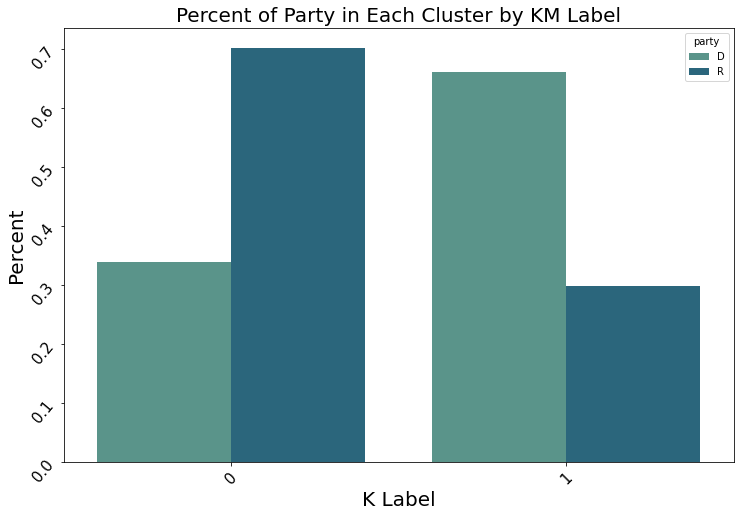

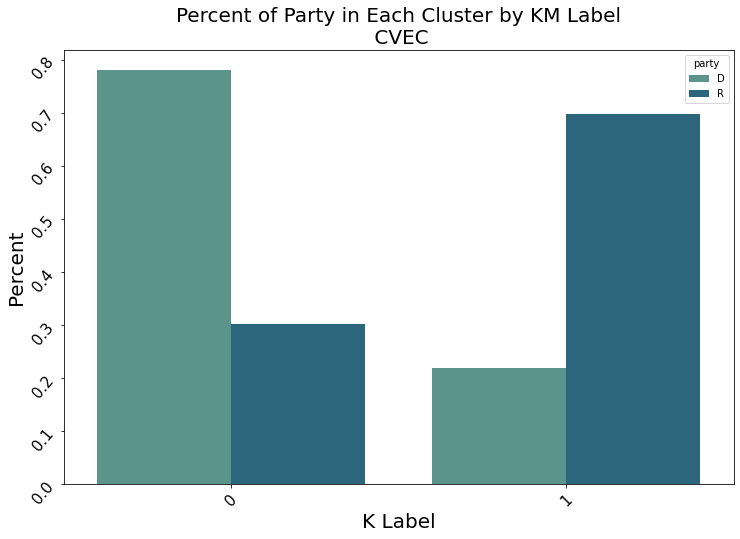

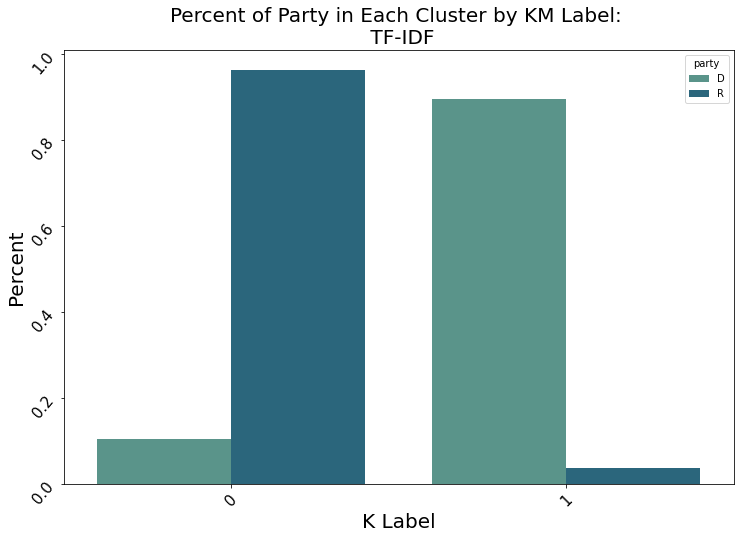

In [15]:
# POLITICAL PARTY

# HELP: https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot
x, y, hue = 'km_label', 'proportion', 'party'
plt.rcParams['figure.figsize'] = [12, 8]

# hue_order = ['Representative', 'Senator']

# dropping independents and libertarians
# chart was difficult to read
df = data.drop(data[data.party == 'I'].index)
df = df.drop(df[df.party == 'L'].index)

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest',
#       order=df.sort_values(y,ascending = False).x
#        order=df['proportion']
#        order=order_list
      ))
plt.title('Percent of Party in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

####################

x, y, hue = 'km_label_cvec', 'proportion', 'party'
# hue_order = ['Representative', 'Senator']
plt.rcParams['figure.figsize'] = [12, 8]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

plt.title('Percent of Party in Each Cluster by KM Label\n CVEC', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

####################

x, y, hue = 'km_label_tvec', 'proportion', 'party'
# hue_order = ['Representative', 'Senator']
plt.rcParams['figure.figsize'] = [12, 8]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

plt.title('Percent of Party in Each Cluster by KM Label: \n TF-IDF', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()

# bar_plot('km_label', 'proportion', 'party', 'Percent of Party in Each Cluster by KM Label', 'K Label', 'Percent')

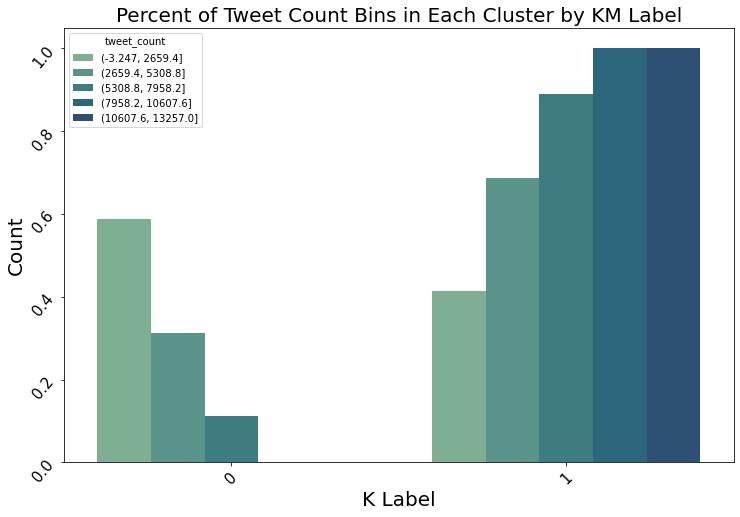

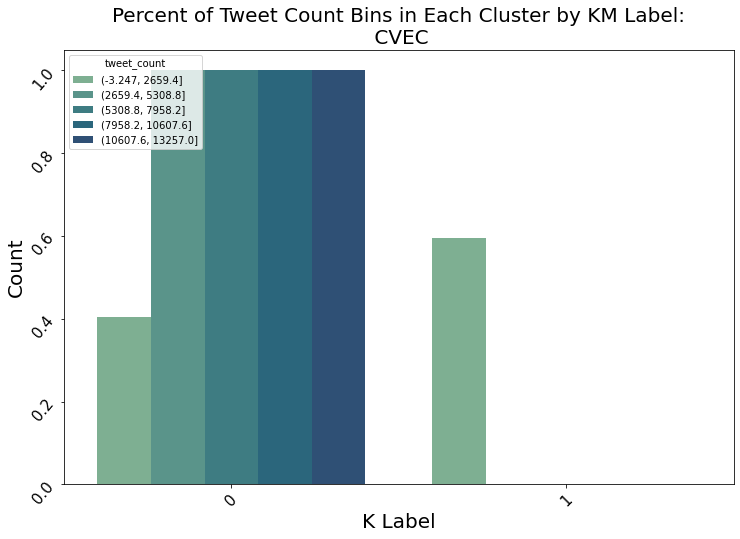

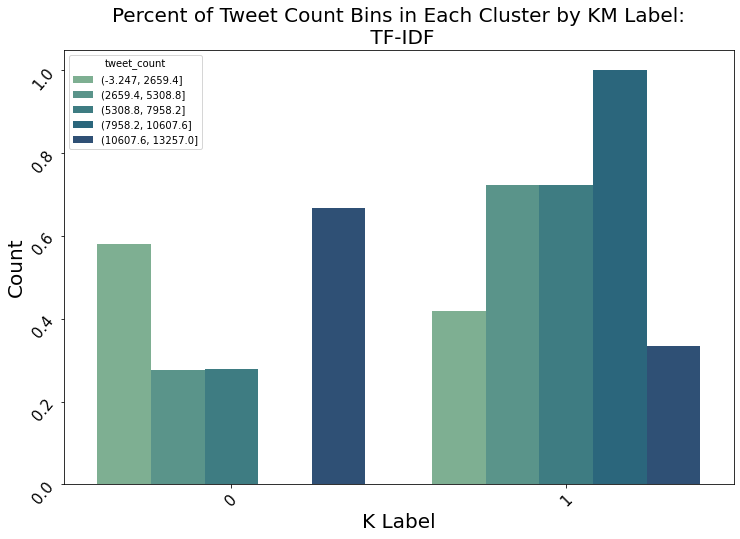

In [16]:
# NUMBER OF TWEETS

x, y, hue = 'km_label', 'proportion', 'tweet_count'
# hue_order = ['Representative', 'Senator']
plt.rcParams['figure.figsize'] = [12, 8]

bins = pd.cut(data['tweet_count'], bins=5)

(data[x]
 .groupby(bins)
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

plt.title('Percent of Tweet Count Bins in Each Cluster by KM Label', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()



x, y, hue = 'km_label_cvec', 'proportion', 'tweet_count'
# hue_order = ['Representative', 'Senator']
plt.rcParams['figure.figsize'] = [12, 8]

(data[x]
 .groupby(bins)
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

plt.title('Percent of Tweet Count Bins in Each Cluster by KM Label:\n CVEC', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()




x, y, hue = 'km_label_tvec', 'proportion', 'tweet_count'
# hue_order = ['Representative', 'Senator']
plt.rcParams['figure.figsize'] = [12, 8]

(data[x]
 .groupby(bins)
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, 'data'), x=x, y=y, hue=hue, palette='crest'))

plt.title('Percent of Tweet Count Bins in Each Cluster by KM Label:\n TF-IDF', fontsize=20)

plt.xlabel('K Label', fontsize=20)
plt.xticks(fontsize= 15, rotation=45)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize= 15, rotation=50)

plt.show()